# Comparisons, Masks, and Boolean Logic:

In [1]:
!git clone https://github.com/jakevdp/PythonDataScienceHandbook.git

fatal: destination path 'PythonDataScienceHandbook' already exists and is not an empty directory.


In [2]:
path='C:/Users/hamdi/OneDrive/Documents/Untitled Folder/Data science book/PythonDataScienceHandbook/notebooks/data/Seattle2014.csv'

In [3]:
 import numpy as np
 import pandas as pd
 # use Pandas to extract rainfall inches as a NumPy array
 rainfall = pd.read_csv(path)['PRCP'].values
 inches = rainfall / 254 # 1/10mm -> inches
 inches.shape

(365,)

In [4]:
 %matplotlib inline
 import matplotlib.pyplot as plt
 import seaborn; seaborn.set() # set plot styles

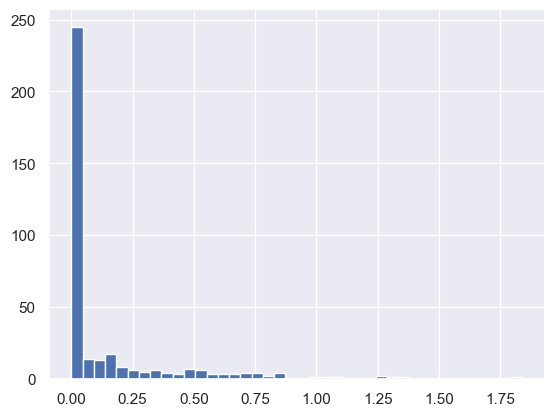

In [7]:
    plt.hist(inches, 40);

In [8]:
#Comparison Operators as ufuncs


In [9]:
np.sum((inches > 0.5) & (inches < 1))


29

In [10]:
 print("Number days without rain: ", np.sum(inches == 0))
 print("Number days with rain: ", np.sum(inches != 0))
 print("Days with more than 0.5 inches:", np.sum(inches > 0.5))
 print("Rainy days with < 0.1 inches :", np.sum((inches > 0) &
 (inches < 0.2)))

Number days without rain:  215
Number days with rain:  150
Days with more than 0.5 inches: 37
Rainy days with < 0.1 inches : 75


In [11]:
# Boolean Arrays as Masks


In [15]:
 rng = np.random.RandomState(0)
 x = rng.randint(10, size=(3, 4))
 x


array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [16]:
 x<5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [17]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [19]:
# construct a mask of all rainy days
rainy = (inches > 0)
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches): ",
 np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ",
 np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
 np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
 np.median(inches[rainy & ~summer]))


Median precip on rainy days in 2014 (inches):  0.19488188976377951
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  0.8503937007874016
Median precip on non-summer rainy days (inches): 0.20078740157480315


In [20]:
#Using the Keywords and/or Versus the Operators &/| check page 77
 

IndentationError: unexpected indent (836522071.py, line 2)

In [21]:
 A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
 B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
 A | B


array([ True,  True,  True, False,  True,  True])

In [22]:
A or B
'''so remember this: and and or perform a single Boolean evaluation on an entire
object, while & and | perform multiple Boolean evaluations on the content (the indi‐
vidual bits or bytes) of an object. For Boolean NumPy arrays, the latter is nearly
always the desired operation.'''

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [26]:
#Fancy Indexing
#Exploring Fancy Indexing
import numpy as np
rand = np.random.RandomState(42)
x = rand.randint(100, size=10)
print(x)


[51 92 14 71 60 20 82 86 74 74]


In [27]:
[x[3], x[7], x[2]]

[71, 86, 14]

In [28]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

In [31]:
 ind = np.array([[3, 7],
 [4, 5]])
 x[ind]
 '''
 With fancy indexing, the shape of the result reflects the shape of the index arrays
rather than the shape of the array being indexed'''

'\nWith fancy indexing, the shape of the result reflects the shape of the index arrays\nrather than the shape of the array being indexed'

In [32]:
 X = np.arange(12).reshape((3, 4))
 X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [33]:
 row = np.array([0, 1, 2])
 col = np.array([2, 1, 3])
 X[row, col]

array([ 2,  5, 11])

In [34]:
X[row[:, np.newaxis], col]


array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [35]:
row[:, np.newaxis] * col


array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

In [36]:
#Combined Indexing


In [37]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [38]:
X[2, [2, 0, 1]]


array([10,  8,  9])

In [39]:
 X[1:, [2, 0, 1]]


array([[ 6,  4,  5],
       [10,  8,  9]])

In [40]:
 mask = np.array([1, 0, 1, 0], dtype=bool)
 X[row[:, np.newaxis], mask]


array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [41]:
#Example: Selecting Random Points


In [43]:
 mean = [0, 0]
 cov = [[1, 2],
 [2, 5]]
 X = rand.multivariate_normal(mean, cov, 100)
 X.shape

(100, 2)

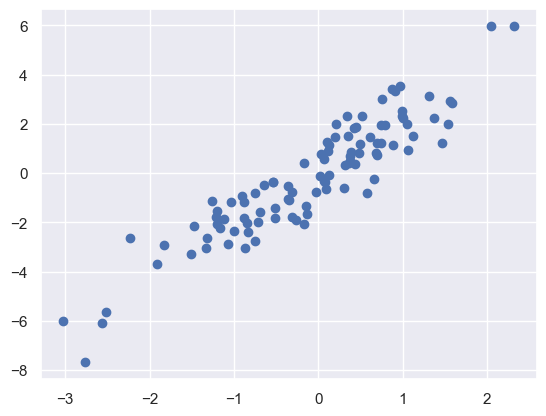

In [44]:
 %matplotlib inline
 import matplotlib.pyplot as plt
 import seaborn; seaborn.set() # for plot styling
 plt.scatter(X[:, 0], X[:, 1]);


In [45]:
 indices = np.random.choice(X.shape[0], 20, replace=False)
 indices

array([28, 24, 53, 66, 23, 87, 31, 72, 64, 48,  3, 59, 36, 58, 43,  6, 98,
       73,  5, 60])

In [46]:
 selection = X[indices] # fancy indexing here
 selection.shape

(20, 2)

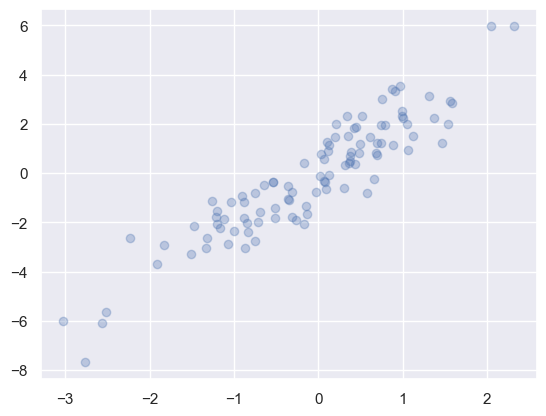

In [47]:
 plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
 plt.scatter(selection[:, 0], selection[:, 1],
 facecolor='none', s=200);


In [48]:
# Modifying Values with Fancy Indexing


In [49]:
 x = np.arange(10)
 i = np.array([2, 1, 8, 4])
 x[i] = 99
 print(x)


[ 0 99 99  3 99  5  6  7 99  9]


In [51]:
 i = [2, 3, 3, 4, 4, 4]
 x[i] += 1
 x
 '''
 x +=1 <=> x=x+1  
 
 '''

'\nx +=1 <=> x=x+1  \n\n'

In [52]:
 x = np.zeros(10)
 np.add.at(x, i, 1)
 print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [53]:
#binniiing 

In [54]:
 np.random.seed(42)
 x = np.random.randn(100)
 # compute a histogram by hand
 bins = np.linspace(-5, 5, 20)
 counts = np.zeros_like(bins)
 # find the appropriate bin for each x
 i = np.searchsorted(bins, x)
 # add 1 to each of these bins
 np.add.at(counts, i, 1)


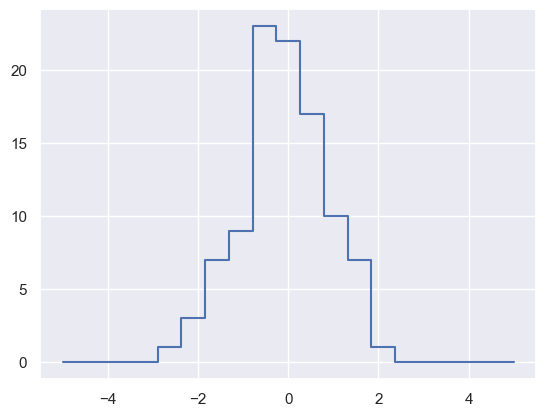

In [60]:
 # plot the results
 plt.plot(bins, counts, drawstyle='steps');

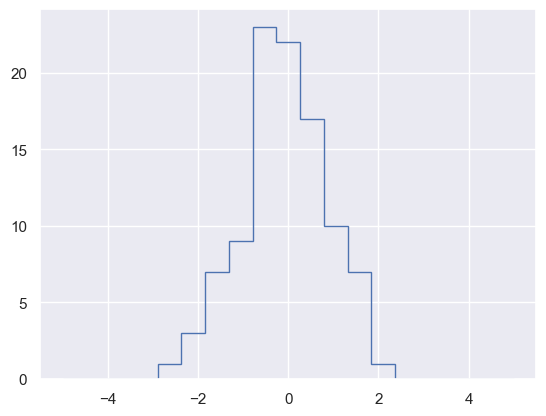

In [61]:
plt.hist(x, bins, histtype='step');


In [63]:
 print("NumPy routine:")
 %timeit counts, edges = np.histogram(x, bins)
 print("Custom routine:")
 %timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
23.8 µs ± 2.65 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Custom routine:
16 µs ± 824 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [65]:
np.histogram?

In [66]:
 x = np.random.randn(1000000)
 print("NumPy routine:")
 %timeit counts, edges = np.histogram(x, bins)
 print("Custom routine:")
 %timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
61.2 ms ± 3.13 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
119 ms ± 1.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [67]:
#as you see here: np is better when the data becomes large!

In [68]:
# Sorting Arrays


In [72]:
 import numpy as np
 def selection_sort(x):
    
    for i in range(len(x)):
        
        swap = i + np.argmin(x[i:])
        (x[i], x[swap]) = (x[swap], x[i])
    return x

In [73]:
 x = np.array([2, 1, 4, 3, 5])
 selection_sort(x)


array([1, 2, 3, 4, 5])

In [76]:
 #Fast Sorting in NumPy: np.sort and np.argsort
 x = np.array([2, 1, 4, 3, 5])
 np.sort(x)


array([1, 2, 3, 4, 5])

In [77]:
 x.sort()
 print(x)

[1 2 3 4 5]


In [78]:
 x = np.array([2, 1, 4, 3, 5])
 i = np.argsort(x)
 print(i)
 

[1 0 3 2 4]


In [79]:
x[i]


array([1, 2, 3, 4, 5])

In [80]:
 rand = np.random.RandomState(42)
 X = rand.randint(0, 10, (4, 6))
 print(X)


[[6 3 7 4 6 9]
 [2 6 7 4 3 7]
 [7 2 5 4 1 7]
 [5 1 4 0 9 5]]


In [81]:
 # sort each column of X
 np.sort(X, axis=0)

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [82]:
 # sort each row of X
 np.sort(X, axis=1)

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])

In [84]:
 # Partial Sorts: Partitioning
 x = np.array([7, 2, 3, 1, 6, 5, 4])
 np.partition(x, 3)

array([2, 1, 3, 4, 6, 5, 7])

In [85]:
np.partition(X, 2, axis=1)

array([[3, 4, 6, 7, 6, 9],
       [2, 3, 4, 7, 6, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 9, 5]])

In [86]:
#Example: k-Nearest Neighbors


In [88]:
X = rand.rand(10, 2)


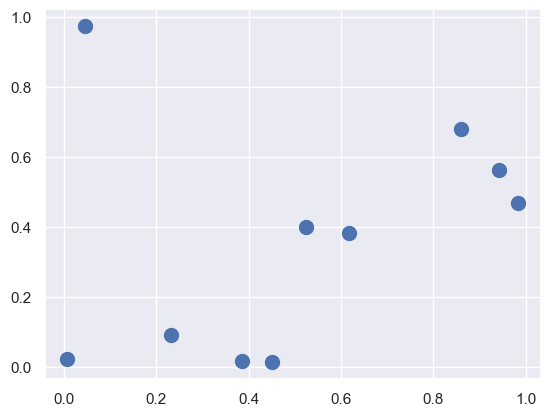

In [89]:
 %matplotlib inline
 import matplotlib.pyplot as plt
 import seaborn; seaborn.set() # Plot styling
 plt.scatter(X[:, 0], X[:, 1], s=100);

In [90]:
dist_sq = np.sum((X[:,np.newaxis,:] - X[np.newaxis,:,:]) ** 2, axis=-1)

In [91]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 9 7 1 4 2 5 6 8]
 [1 4 7 9 3 6 8 5 0 2]
 [2 1 4 6 3 0 8 9 7 5]
 [3 9 7 0 1 4 5 8 6 2]
 [4 1 8 5 6 7 9 3 0 2]
 [5 8 6 4 1 7 9 3 2 0]
 [6 8 5 4 1 7 9 3 2 0]
 [7 9 3 1 4 0 5 8 6 2]
 [8 5 6 4 1 7 9 3 2 0]
 [9 7 3 0 1 4 5 8 6 2]]


In [92]:
 K = 2
 nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

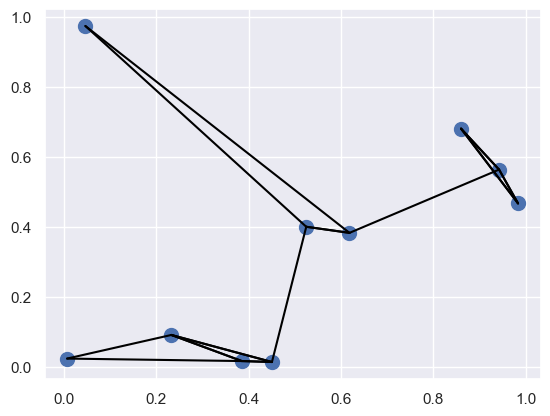

In [93]:
 plt.scatter(X[:, 0], X[:, 1], s=100)
 # draw lines from each point to its two nearest neighbors
 K = 2
 for i in range(X.shape[0]):
    
    for j in nearest_partition[i, :K+1]:
        
       # plot a line from X[i] to X[j]
       # use some zip magic to make it happen:
       plt.plot(*zip(X[j], X[i]), color='black')


In [4]:
# Structured Data: NumPy’s Structured Arrays:
import numpy as np

In [5]:
 name = ['Alice', 'Bob', 'Cathy', 'Doug']
 age = [25, 45, 37, 19]
 weight = [55.0, 85.5, 68.0, 61.5]


In [6]:
x = np.zeros(4, dtype=int)

In [8]:
 # Use a compound data type for structured arrays
 data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
 'formats':('U10', 'i4', 'f8')})
 print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


In [9]:
 data['name'] = name
 data['age'] = age
 data['weight'] = weight
 print(data)


[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]
